In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

#get csv housing data
data = "Housing_Demand_and_Availability_by_Income CLEANED UP.csv"
CLThousing = pd.read_csv(data)
CLThousing.head()

,DIVISION,PUMA,REGION,ST,TYPE,ACR,BATH,BDSP,BLD,ELEFP,...,WGTP77,WGTP78,WGTP79,WGTP80,WGTP_CLT,AMI,AFF_OCC,AFF_VACS,COST_BURDALL,YEAR
0,5,3102,3,37,1,1.0,1,3,2,3.0,...,58,188,173,54,200.33,1.0,3.0,NaN,1.0,2018
1,5,3104,3,37,1,NaN,1,2,6,3.0,...,164,119,115,35,111.87,7.0,4.0,NaN,0.0,2018
2,5,3105,3,37,1,NaN,1,2,5,NaN,...,23,151,149,136,81.51,NaN,2.0,2.0,NaN,2018
3,5,3101,3,37,1,1.0,1,3,2,3.0,...,83,95,148,24,90.00,5.0,2.0,NaN,0.0,2018
4,5,3105,3,37,1,NaN,1,2,7,3.0,...,66,16,58,21,61.87,5.0,3.0,NaN,0.0,2018


In [2]:
#create new dataFrame that only has rows needed to reviewing 
#renting issues in Charlotte NC
cltDF = CLThousing[['RNTP', 'BDSP', 'BLD']]

#rename the columns to easier understand
cltDF = cltDF.rename(columns={'RNTP': "Monthly Rent Price",
                    "BDSP": "Number of Bedrooms",
                    "BLD": "Building Type"})
cltDF.head()

,Monthly Rent Price,Number of Bedrooms,Building Type
0,800.0,3,2
1,1100.0,2,6
2,450.0,2,5
3,600.0,3,2
4,800.0,2,7


In [3]:
#remove columns that do not have rent price listed
cltDF.dropna(subset=["Monthly Rent Price"],inplace=True)
cltDF.head()

,Monthly Rent Price,Number of Bedrooms,Building Type
0,800.0,3,2
1,1100.0,2,6
2,450.0,2,5
3,600.0,3,2
4,800.0,2,7


In [4]:
#df = df.drop(df[df.score < 50].index)
cltIndex = cltDF[cltDF['Monthly Rent Price']>2500].index
cltDF = cltDF.drop(cltIndex, inplace=False)
cltDF.head()

,Monthly Rent Price,Number of Bedrooms,Building Type
0,800.0,3,2
1,1100.0,2,6
2,450.0,2,5
3,600.0,3,2
4,800.0,2,7


In [5]:
#add in Rent by Room column and calc
cltDF=cltDF.astype({"Monthly Rent Price": "float64",
                    "Number of Bedrooms": "int32"})
cltDF["Rent by Room"] = cltDF.apply(lambda x : x["Monthly Rent Price"]/x["Number of Bedrooms"], axis=1)
cltDF.head()

<ipython-input-5-d3011dae0305>:4: RuntimeWarning: divide by zero encountered in double_scalars
  cltDF["Rent by Room"] = cltDF.apply(lambda x : x["Monthly Rent Price"]/x["Number of Bedrooms"], axis=1)


,Monthly Rent Price,Number of Bedrooms,Building Type,Rent by Room
0,800.0,3,2,266.666667
1,1100.0,2,6,550.000000
2,450.0,2,5,225.000000
3,600.0,3,2,200.000000
4,800.0,2,7,400.000000


In [6]:
#find median for 0 bedrooms
Studio= cltDF[cltDF["Number of Bedrooms"]==0].mean()
Studio

Monthly Rent Price    1040.519481
Number of Bedrooms       0.000000
Building Type            8.311688
Rent by Room                  inf
dtype: float64

In [7]:
#find median for 1 bedrooms
OneBed=cltDF[cltDF["Number of Bedrooms"]==1].mean()
OneBed

Monthly Rent Price    925.673759
Number of Bedrooms      1.000000
Building Type           7.304965
Rent by Room          925.673759
dtype: float64

In [8]:
#find median for 2 bedrooms
TwoBed=cltDF[cltDF["Number of Bedrooms"]==2].mean()
TwoBed

Monthly Rent Price    1038.620451
Number of Bedrooms       2.000000
Building Type            5.901213
Rent by Room           519.310225
dtype: float64

In [9]:
#find median for 3 bedrooms
ThreeBed=cltDF[cltDF["Number of Bedrooms"]==3].mean()
ThreeBed

Monthly Rent Price    1084.550000
Number of Bedrooms       3.000000
Building Type            3.330000
Rent by Room           361.516667
dtype: float64

In [10]:
#find median for 4 bedrooms
FourBed=cltDF[cltDF["Number of Bedrooms"]==4].mean()
FourBed

Monthly Rent Price    1238.023256
Number of Bedrooms       4.000000
Building Type            2.581395
Rent by Room           309.505814
dtype: float64

In [11]:
#find median for 5 bedrooms
FiveBed=cltDF[cltDF["Number of Bedrooms"]==5].mean()
FiveBed

Monthly Rent Price    1388.181818
Number of Bedrooms       5.000000
Building Type            3.181818
Rent by Room           277.636364
dtype: float64

In [18]:
newDF= pd.DataFrame({"Stu": Studio["Monthly Rent Price"],
                    "1Br": OneBed["Monthly Rent Price"],
                    "2Br": TwoBed["Monthly Rent Price"],
                    "3Br": ThreeBed["Monthly Rent Price"],
                     "4Br": FourBed["Monthly Rent Price"],
                     "5Br": FiveBed["Monthly Rent Price"]},index=["Monthly Rent Price"])
newDF=newDF.transpose()

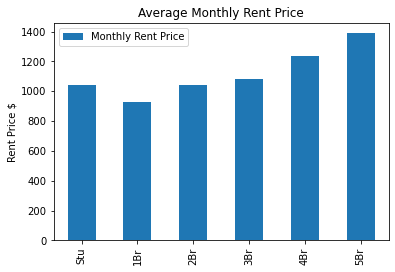

In [19]:
#graph to show monthly rent by number of rooms
newDF.plot(kind="bar")
plt.title("Average Monthly Rent Price")
plt.ylabel("Rent Price $")
plt.savefig("Hannah-1.png")
plt.show()

In [20]:
newTwoDF= pd.DataFrame({"1Br": OneBed["Rent by Room"],
                    "2Br": TwoBed["Rent by Room"],
                    "3Br": ThreeBed["Rent by Room"],
                     "4Br": FourBed["Rent by Room"],
                     "5Br": FiveBed["Rent by Room"]},index=["Rent by Room"])
newTwoDF=newTwoDF.transpose()

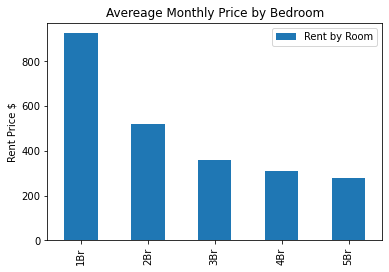

In [21]:
#graph to show monthly rent if number of rooms is taken into consideration
newTwoDF.plot(kind="bar")
plt.title("Avereage Monthly Price by Bedroom")
plt.ylabel("Rent Price $")
plt.savefig("Hannah-2.png")
plt.show()